In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_curve, auc, confusion_matrix, classification_report)
from sklearn.metrics import ConfusionMatrixDisplay

# Load dataset
data = pd.read_csv('Dataset.csv')


In [13]:
# Task 1: Handle missing values
data['Profession'] = data['Profession'].fillna('Unknown')
print("Missing values handled. First few rows:\n", data.head())


Missing values handled. First few rows:
    CustomerID  Gender  Age  Annual Income  Spending Score     Profession  \
0           1    Male   19          15000              39     Healthcare   
1           2    Male   21          35000              81       Engineer   
2           3  Female   20          86000               6       Engineer   
3           4  Female   23          59000              77         Lawyer   
4           5  Female   31          38000              40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6  


In [14]:
# Task 2: Encode categorical columns
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Profession'] = label_encoder.fit_transform(data['Profession'])
print("Categorical data encoded. Unique values:\n", data[['Gender', 'Profession']].head())


Categorical data encoded. Unique values:
    Gender  Profession
0       1           5
1       1           2
2       0           2
3       0           7
4       0           3


In [15]:
# Task 3: Define features and target
features = data.drop(columns=['CustomerID', 'Spending Score'])  # Drop unrelated columns
target = data['Spending Score']
print("Features and Target defined. Features:\n", features.head())
print("Target (Spending Score):\n", target.head())


Features and Target defined. Features:
    Gender  Age  Annual Income  Profession  Work Experience  Family Size
0       1   19          15000           5                1            4
1       1   21          35000           2                3            3
2       0   20          86000           2                1            1
3       0   23          59000           7                0            2
4       0   31          38000           3                2            6
Target (Spending Score):
 0    39
1    81
2     6
3    77
4    40
Name: Spending Score, dtype: int64


In [16]:
# Task 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print("Dataset split completed.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Dataset split completed.
Training set shape: (560, 6)
Testing set shape: (240, 6)


In [17]:
# Task 5: Transform target variable into bins
bins = [0, 33, 66, 100]
labels = ['Low', 'Medium', 'High']
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)
print("Target variable transformed into bins:\n", y_train_binned.head())


Target variable transformed into bins:
 404    Medium
522       Low
749      High
426       Low
41       High
Name: Spending Score, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [18]:
# Task 6: Train Decision Tree classifiers
y_train_encoded = label_encoder.fit_transform(y_train_binned)
y_test_encoded = label_encoder.transform(y_test_binned)

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

dt_gini.fit(X_train, y_train_encoded)
dt_entropy.fit(X_train, y_train_encoded)

print("Decision Tree Classifiers trained successfully.")


Decision Tree Classifiers trained successfully.


In [19]:
# Task 7: Predictions and accuracy
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test_encoded, y_pred_gini)
accuracy_entropy = accuracy_score(y_test_encoded, y_pred_entropy)

print(f"Accuracy (Gini): {accuracy_gini:.2f}")
print(f"Accuracy (Entropy): {accuracy_entropy:.2f}")


Accuracy (Gini): 0.33
Accuracy (Entropy): 0.36


In [20]:
# Task 8: Precision, Recall, and F1 Score
precision_gini = precision_score(y_test_encoded, y_pred_gini, average='weighted')
recall_gini = recall_score(y_test_encoded, y_pred_gini, average='weighted')
f1_gini = f1_score(y_test_encoded, y_pred_gini, average='weighted')

precision_entropy = precision_score(y_test_encoded, y_pred_entropy, average='weighted')
recall_entropy = recall_score(y_test_encoded, y_pred_entropy, average='weighted')
f1_entropy = f1_score(y_test_encoded, y_pred_entropy, average='weighted')

print(f"Precision (Gini): {precision_gini:.2f}, Recall (Gini): {recall_gini:.2f}, F1 Score (Gini): {f1_gini:.2f}")
print(f"Precision (Entropy): {precision_entropy:.2f}, Recall (Entropy): {recall_entropy:.2f}, F1 Score (Entropy): {f1_entropy:.2f}")


Precision (Gini): 0.33, Recall (Gini): 0.33, F1 Score (Gini): 0.33
Precision (Entropy): 0.37, Recall (Entropy): 0.36, F1 Score (Entropy): 0.36


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Task 9: Confusion Matrix
conf_matrix_gini = confusion_matrix(y_test_encoded, y_pred_gini)
conf_matrix_entropy = confusion_matrix(y_test_encoded, y_pred_entropy)

print("Confusion Matrix (Gini):\n", conf_matrix_gini)
print("Confusion Matrix (Entropy):\n", conf_matrix_entropy)


Confusion Matrix (Gini):
 [[30 22 30  0]
 [23 22 30  0]
 [29 26 27  1]
 [ 0  0  0  0]]
Confusion Matrix (Entropy):
 [[32 23 25  2]
 [24 22 29  0]
 [31 18 33  1]
 [ 0  0  0  0]]


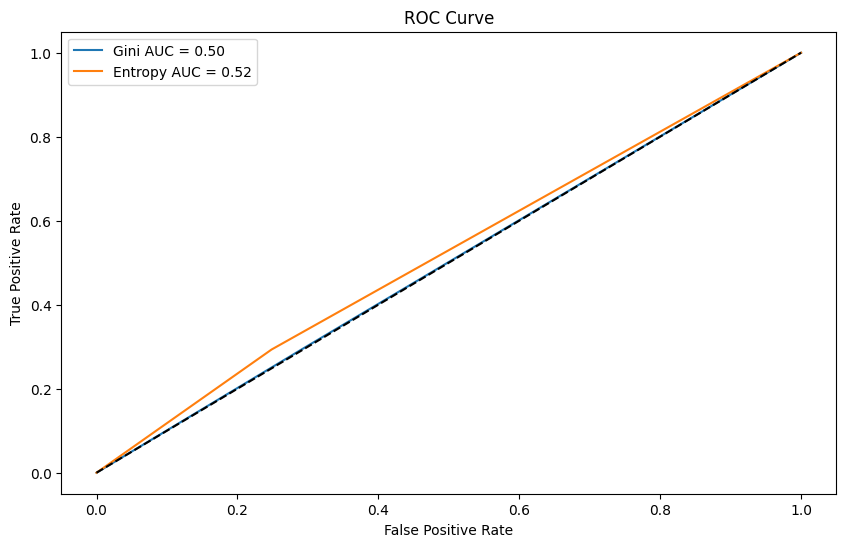

In [22]:
# Task 10: ROC Curve
fpr_gini, tpr_gini, _ = roc_curve(y_test_encoded, dt_gini.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc_gini = auc(fpr_gini, tpr_gini)

fpr_entropy, tpr_entropy, _ = roc_curve(y_test_encoded, dt_entropy.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc_entropy = auc(fpr_entropy, tpr_entropy)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label=f'Gini AUC = {roc_auc_gini:.2f}')
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy AUC = {roc_auc_entropy:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


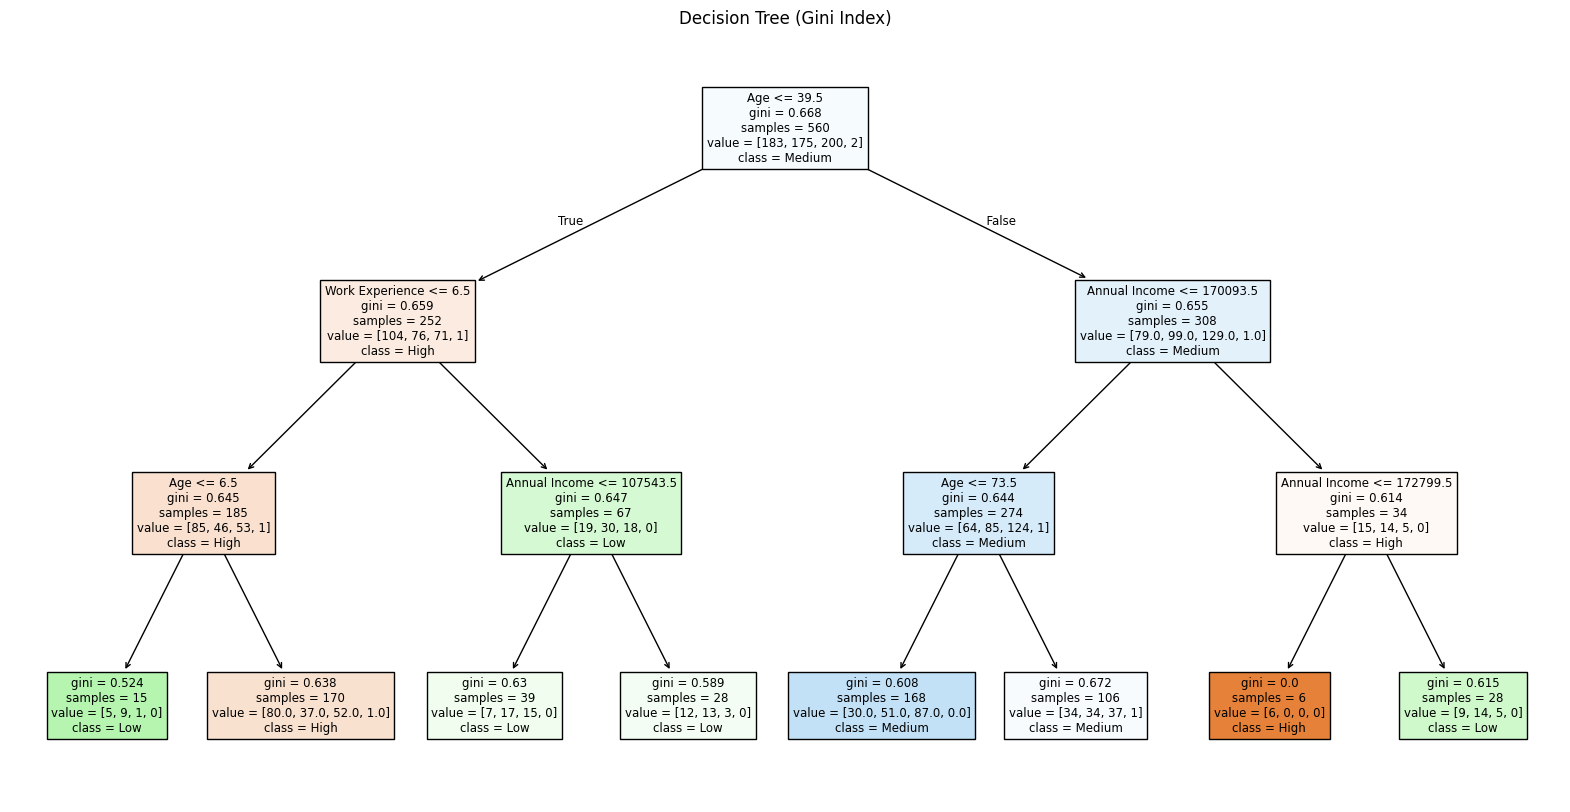

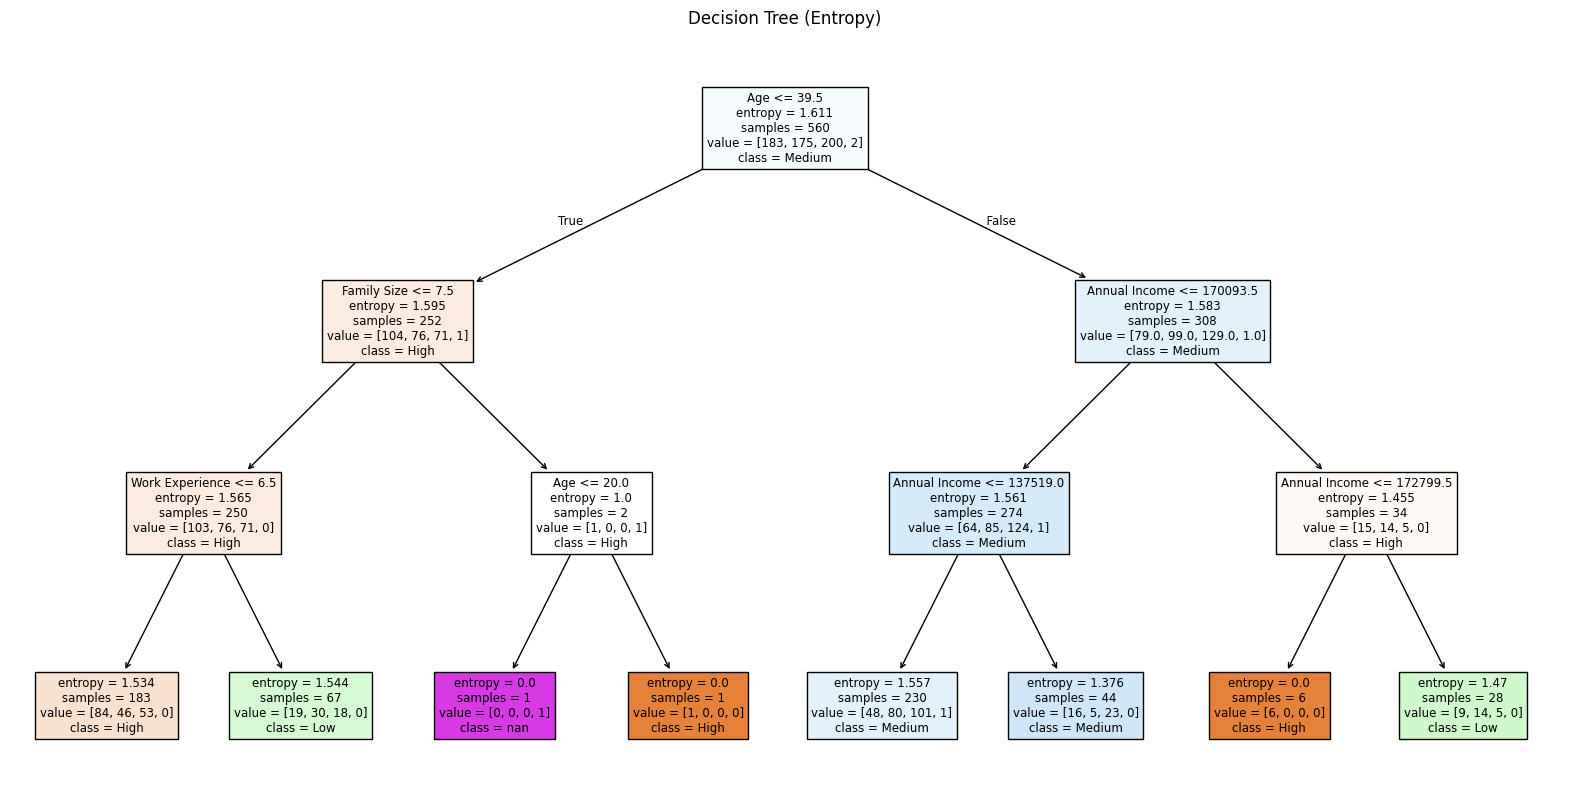

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define Decision Tree classifiers with max_depth
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=30) 
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=30)  
# Train the models
dt_gini.fit(X_train, y_train_encoded)
dt_entropy.fit(X_train, y_train_encoded)

# Convert class names to string format
class_names = [str(cls) for cls in label_encoder.classes_]

# Plot Decision Tree for Gini
plt.figure(figsize=(20, 10))
plot_tree(dt_gini, feature_names=X_train.columns, class_names=class_names, filled=True)
plt.title("Decision Tree (Gini Index)")
plt.show()

# Plot Decision Tree for Entropy
plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, feature_names=X_train.columns, class_names=class_names, filled=True)
plt.title("Decision Tree (Entropy)")
plt.show()


In [13]:
# Task 12: Feature Importance
feature_importance_gini = pd.Series(dt_gini.feature_importances_, index=X_train.columns)
feature_importance_entropy = pd.Series(dt_entropy.feature_importances_, index=X_train.columns)

print("Feature Importance (Gini):\n", feature_importance_gini)
print("Feature Importance (Entropy):\n", feature_importance_entropy)


Feature Importance (Gini):
 Gender             0.032745
Age                0.230064
Annual Income      0.337003
Profession         0.144667
Work Experience    0.140500
Family Size        0.115021
dtype: float64
Feature Importance (Entropy):
 Gender             0.040530
Age                0.232830
Annual Income      0.308624
Profession         0.126238
Work Experience    0.175965
Family Size        0.115813
dtype: float64


CCP Alphas:
 [0.         0.00191327 0.00238095 0.00282738 0.00285714 0.00297877
 0.00328869 0.00355789 0.00357906 0.00363095 0.00364138 0.00385027
 0.00406037 0.00406997 0.00411026 0.00422138 0.00469932 0.00547146
 0.00561292 0.00569777 0.00622963 0.00655012 0.00792629 0.01078766]


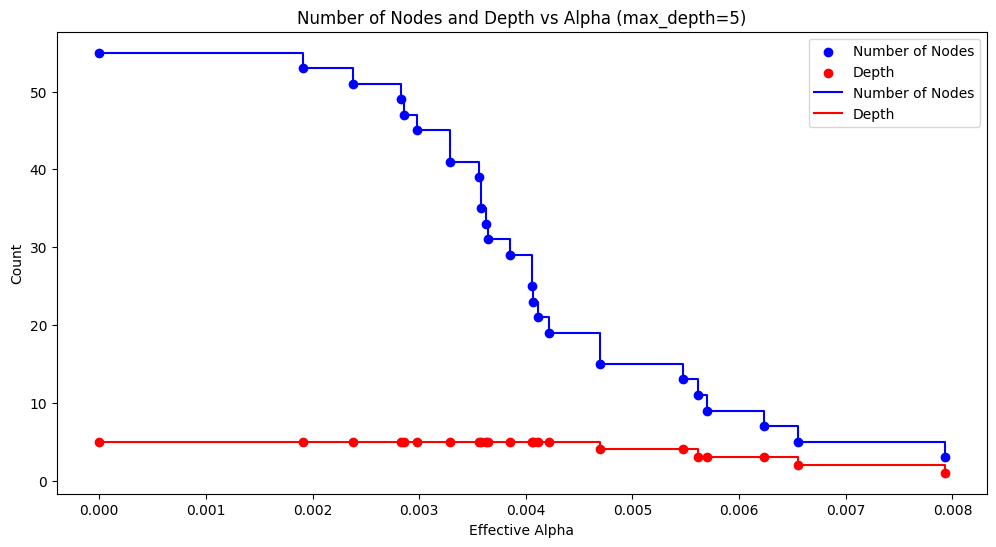

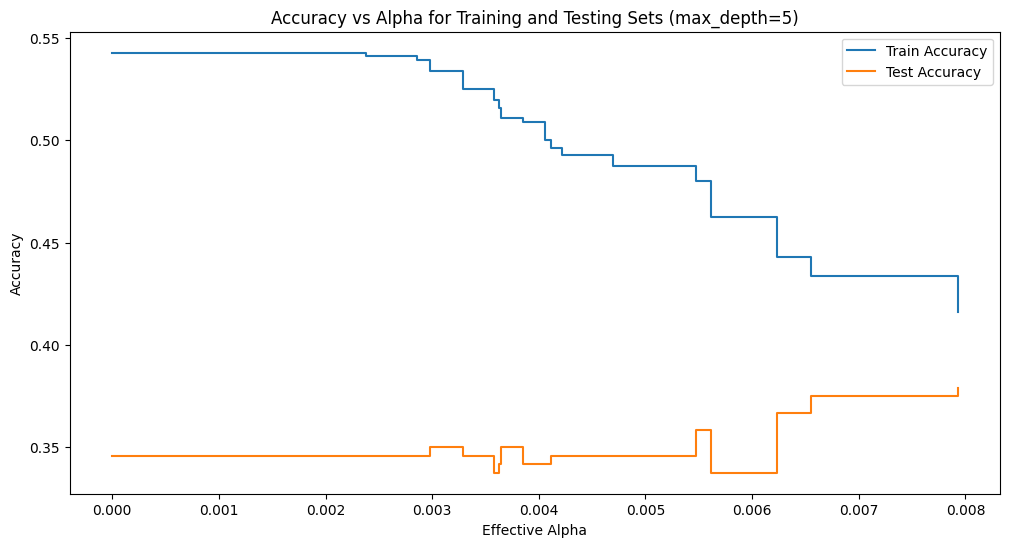

In [35]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt

max_depth = 5  

# Train a base Decision Tree and get the cost-complexity pruning path
clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
clf.fit(X_train, y_train_encoded)

# Get the pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train_encoded)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("CCP Alphas:\n", ccp_alphas)

# Train a tree for each alpha and store them
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, max_depth=max_depth)
    clf.fit(X_train, y_train_encoded)
    clfs.append(clf)

# Remove the last tree with no splits
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Gather tree statistics (number of nodes and depth)
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Plot the effect of pruning on the number of nodes and depth
plt.figure(figsize=(12, 6))
plt.scatter(ccp_alphas, node_counts, label="Number of Nodes", color="blue")
plt.scatter(ccp_alphas, depth, label="Depth", color="red")
plt.plot(ccp_alphas, node_counts, label="Number of Nodes", drawstyle="steps-post", color="blue")
plt.plot(ccp_alphas, depth, label="Depth", drawstyle="steps-post", color="red")
plt.xlabel("Effective Alpha")
plt.ylabel("Count")
plt.title(f"Number of Nodes and Depth vs Alpha (max_depth={max_depth})")
plt.legend()
plt.show()

# Evaluate models on Test Data and track accuracy
train_accuracies = []
test_accuracies = []

for clf in clfs:
    train_accuracies.append(clf.score(X_train, y_train_encoded))
    test_accuracies.append(clf.score(X_test, y_test_encoded))

# Plot Accuracy vs Alpha
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, train_accuracies, label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_accuracies, label="Test Accuracy", drawstyle="steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs Alpha for Training and Testing Sets (max_depth={max_depth})")
plt.legend()
plt.show()


Train Accuracy: 0.36
Test Accuracy: 0.35


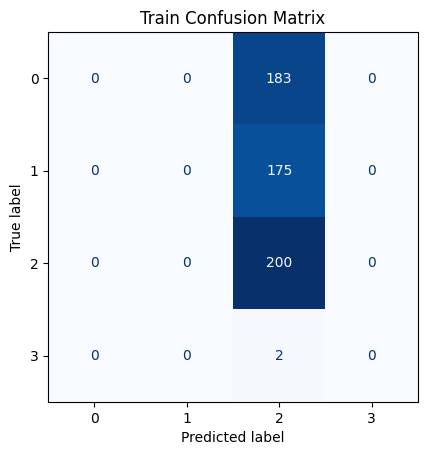

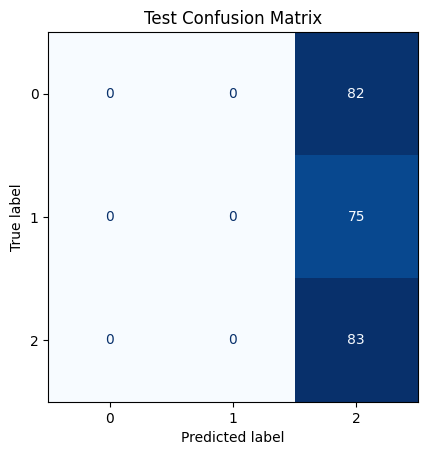

In [36]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define a function to plot the confusion matrix
def plot_confusionmatrix(y_pred, y_actual, dom=''):
    """Plots the confusion matrix."""
    ConfusionMatrixDisplay.from_predictions(y_actual, y_pred, cmap='Blues', colorbar=False)
    plt.title(f'{dom} Confusion Matrix')
    plt.show()

# Define and train the Decision Tree with specific ccp_alpha
ccp_alpha_value = 0.020  # Set your desired pruning parameter
clf_ = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha_value)

# Fit the model to the training data
clf_.fit(X_train, y_train_encoded)

# Predictions for training and testing data
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

# Print accuracy scores
print(f"Train Accuracy: {accuracy_score(y_train_encoded, y_train_pred):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test_encoded, y_test_pred):.2f}")

# Plot confusion matrices for Train and Test data
plot_confusionmatrix(y_train_pred, y_train_encoded, dom='Train')
plot_confusionmatrix(y_test_pred, y_test_encoded, dom='Test')
